# P2: Project proposal and initial analyses
When you are done with Homework H1, you will continue to work on the next project milestone. In Milestone P2, together with your team members, you will agree on and refine your project proposal. Your first task is to select a project. Even though we provide the datasets for you to use, at this juncture, it is your responsibility to perform initial analyses and verify that what you propose is feasible given the data (including any additional data you might bring in yourself), which is crucial for the success of the project.

The goal of this milestone is to intimately acquaint yourself with the data, preprocess it, and complete all the necessary descriptive statistics tasks. We expect you to have a pipeline in place, fully documented in a notebook, and show us that you have clear project goals.

When describing the relevant aspects of the data, and any other datasets you may intend to use, you should in particular show (non-exhaustive list):

- That you can handle the data in its size.
- That you understand what’s in the data (formats, distributions, missing values, correlations, etc.).
- That you considered ways to enrich, filter, transform the data according to your needs.
- That you have a reasonable plan and ideas for methods you’re going to use, giving their essential mathematical details in the notebook.
- That your plan for analysis and communication is reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.

We will evaluate this milestone according to how well these steps have been done and documented, the quality of the code and its documentation, the feasibility and critical awareness of the project. We will also evaluate this milestone according to how clear, reasonable, and well thought-through the project idea is. Please use the second milestone to really check with us that everything is in order with your project (idea, feasibility, etc.) before you advance too much with the final Milestone P3! There will be project office hours dedicated to helping you.

You will work in a public GitHub repository dedicated to your project, which can be created by following this link. The repository will automatically be named ada-2023-project-<your_team_name>. By the Milestone P2 deadline, each team should have a single public GitHub repo under the epfl-ada GitHub organization, containing the project proposal and initial analysis code.

## P2 deliverable (done as a team): GitHub repository with the following:

- Readme.md file containing the detailed project proposal (up to 1000 words). Your README.md should contain:
  - Title
  - bstract: A 150 word description of the project idea and goals. What’s the motivation behind your project? What story would you like to tell, and why?
  - Research Questions: A list of research questions you would like to address during the project.
  - Proposed additional datasets (if any): List the additional dataset(s) you want to use (if any), and some ideas on how you expect to get, manage, process, and enrich it/them. Show us that you’ve read the docs and some examples, and that you have a clear idea on what to expect. Discuss data size and format if relevant. It is your responsibility to check that what you propose is feasible.
  - Methods
  - Proposed timeline
  - Organization within the team: A list of internal milestones up until project Milestone P3.
  - Questions for TAs (optional): Add here any questions you have for us related to the proposed project.
- Notebook containing initial analyses and data handling pipelines. We will grade the correctness, quality of code, and quality of textual descriptions.


In [48]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway,ttest_ind
import statsmodels.formula.api as smf
import numpy as np

# Import the data with the correct format
data_folder = '../Data'
paths_folder = data_folder + '/wikispeedia_paths-and-graph'

# Define the columns of each dataframe
columns_f = ['hashedIpAddress','timestamp','durationInSec','path','rating']
columns_u = ['hashedIpAddress','timestamp','durationInSec','path','target', 'type']

# Define the path to each dataframe
finished_paths = paths_folder + '/paths_finished.tsv'
unfinished_paths = paths_folder + '/paths_unfinished.tsv'
distance_matrix_file = paths_folder + "/shortest-path-distance-matrix.txt"
articles_list_file = paths_folder + '/articles.tsv'

# Load the Data
df_success = pd.read_csv(finished_paths,comment='#',sep='\t',names=columns_f)
df_fail = pd.read_csv(unfinished_paths,comment='#',sep='\t',names=columns_u)

# Control
print('Finished Paths:')
display(df_success)

print('Unfinished Paths:')
display(df_fail)

# Find the median timestamp in df_success
median_timestamp_success = pd.to_datetime(df_success['timestamp'], unit='s').median()
max_timestamp_success = pd.to_datetime(df_success['timestamp'], unit='s').max()

# Find the median timestamp in df_fail
median_timestamp_fail = pd.to_datetime(df_fail['timestamp'], unit='s').median()
max_timestamp_fail = pd.to_datetime(df_fail['timestamp'], unit='s').max()

# Convert the median timestamps to human-readable format
median_timestamp_success_human = median_timestamp_success.strftime('%Y-%m-%d %H:%M:%S')
median_timestamp_fail_human = median_timestamp_fail.strftime('%Y-%m-%d %H:%M:%S')
max_timestamp_success_human = max_timestamp_success.strftime('%Y-%m-%d %H:%M:%S')
max_timestamp_fail_human = max_timestamp_fail.strftime('%Y-%m-%d %H:%M:%S')

# Print the median timestamps in human-readable format
print('Median Timestamp in df_success:', median_timestamp_success_human)
print('Median Timestamp in df_fail:', median_timestamp_fail_human)
print('Max Timestamp in df_success:', max_timestamp_success_human)
print('Max Timestamp in df_fail:', max_timestamp_fail_human)


Finished Paths:


,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0
...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN
51316,19f8284371753362,1298792567,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0


Unfinished Paths:


,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout
...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout


Median Timestamp in df_success: 2010-09-07 21:16:24
Median Timestamp in df_fail: 2012-09-25 15:23:43
Max Timestamp in df_success: 2014-01-15 22:00:50
Max Timestamp in df_fail: 2014-01-15 21:54:01


In [3]:
df_fail = df_fail[~((df_fail.type == 'timeout') &
                    (~df_fail['path'].str.contains(';')))].copy()   #find() returns -1 if not in str. Not finding a ; means player stayed at start
                                                                                                #Writing the inverse condition with a not is more clear


In [4]:
paths_success = df_success.path.apply(lambda x: x.split(';')).copy()
df_success['target'] = paths_success.apply(lambda x: x[len(x)-1])
df_fail.path = df_fail.path.map(str) + ';' + df_fail.target.map(str)


In [5]:
with open(distance_matrix_file, 'r') as file:
    content = file.read()

# Convert to a 2D list representing the distance matrix
rows = content.strip().split('\n')[17:]
distance_matrix = [[int(dist) if dist != '_' else -1 for dist in row] for row in rows]

# We need to get the list of articles as presented in the data, in order to know their index in the dataset, and hence interpret our distance matrix
articles = pd.read_csv("../data/wikispeedia_paths-and-graph/articles.tsv", sep='\t', skiprows= 11, skip_blank_lines=True)
articles_arr = articles.values
article_list = (item[0] for item in articles_arr)

article_index_map = {article: index for index, article in enumerate(article_list)}

In [6]:
columns_cat = ['article', 'category', 'sub_category', 'sub_sub_category']
df_categories = pd.read_csv(paths_folder + '/categories.tsv', comment='#',sep='\t',names=columns_cat)

def split_categories(row):
    categories = row.category.split('.')[1:]    #Drop the "subject."
    row['category'] = categories[0]
    if len(categories) > 1:
        row['sub_category'] = categories[1]
    if len(categories) > 2:
        row['sub_sub_category'] = categories[2]
    return row

df_categories = df_categories.apply(split_categories, axis=1).copy()

In [7]:
def get_distance(row):
    start_index = int(row.start)
    end_index = int(row.end)
    if start_index is None or end_index is None:
        return -1
    return distance_matrix[start_index][end_index]

def augment(df):
    df_out = df.copy()
    df_out['start'] = df.path.apply(lambda x: article_index_map.get(x.split(';')[0])).copy()
    df_out['end']   = df.path.apply(lambda x: article_index_map.get(x.split(';')[-1])).copy()
    df_out = df_out.dropna(axis=0, subset=['end']).copy()
    df_out['game_len'] = df_out.path.apply(lambda x: len(x.split(';')) - 1).copy()
    df_out['optimal_len'] = df_out.apply(get_distance, axis = 1).copy()
    return df_out


In [8]:
#Let's augment our success Dataframe, with the start and end id, as well as a game_len and optimal_len column
df_success = augment(df_success)
df_fail = augment(df_fail)



Now that we succesfully applied this to our DataFrame, let's apply this to our 4 focus games, and see what we get!

In [9]:
import pycountry

def get_iso_code(row):
    try:
        country_raw = row['Country']
        country_name = country_raw.replace("_", "").lower()
        if(country_name == "swaziland"):
            country_name = "eswatini"
        if(country_name == "turkey"):
            country_name = "turkiye"
        if(country_name == "unitedstates"):
            country_name = "usa"
        if(country_name == "unitedkingdom"):
            country_name = "uk"
        if(country_name == "southkorea"):
            country_name = "korea"
        if(country_name == "southafrica"):
            country_name = "za"
        if(country_name == "saudiarabia"):
            country_name = "ksa"
        if(country_name == "unitedarabemirates"):
            country_name = "uae"
        country = pycountry.countries.search_fuzzy(country_name)[0]
        return country.alpha_3
    except LookupError:
        return None



In [10]:

df_combined = pd.concat([df_success.assign(success=1), df_fail.assign(success=0)])

# Merge df_categories with the target article
merged_df = pd.merge(df_combined, df_categories, left_on='target', right_on='article')
countries_data = merged_df[merged_df['category'] == 'Countries']['target']

# Count the number of appearances of each country
country_counts = countries_data.value_counts()

# Calculate the average success rate
average_success_rate = merged_df[merged_df['category'] == 'Countries'].groupby('target')['success'].mean()

# Create a dataframe with the country counts and average success rate
df_countries = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values, 'Average Success Rate': average_success_rate.values})

df_countries['Average Excess Path Length'] = df_success['game_len'] - df_success['optimal_len']

display(df_countries)

df_countries['ISO'] = df_countries.apply(get_iso_code, axis=1)

display(df_countries)



,Country,Count,Average Success Rate,Average Excess Path Length
0,China,118,1.000000,5
1,Vietnam,109,0.916667,1
2,Japan,91,0.937500,4
3,Russia,88,1.000000,1
4,Canada,76,0.909091,3
...,...,...,...,...
220,South_Ossetia,5,0.750000,1
221,Martinique,4,1.000000,1
222,British_Indian_Ocean_Territory,3,1.000000,1
223,Saint_Kitts_and_Nevis,3,0.888889,0


SubdivisionHierarchy(code='ZA-EC', country_code='ZA', name='Eastern Cape', parent_code=None, type='Province')
SubdivisionHierarchy(code='ZA-FS', country_code='ZA', name='Free State', parent_code=None, type='Province')
SubdivisionHierarchy(code='ZA-GP', country_code='ZA', name='Gauteng', parent_code=None, type='Province')
SubdivisionHierarchy(code='ZA-KZN', country_code='ZA', name='Kwazulu-Natal', parent_code=None, type='Province')
SubdivisionHierarchy(code='ZA-LP', country_code='ZA', name='Limpopo', parent_code=None, type='Province')
SubdivisionHierarchy(code='ZA-MP', country_code='ZA', name='Mpumalanga', parent_code=None, type='Province')
SubdivisionHierarchy(code='ZA-NC', country_code='ZA', name='Northern Cape', parent_code=None, type='Province')
SubdivisionHierarchy(code='ZA-NW', country_code='ZA', name='North-West', parent_code=None, type='Province')
SubdivisionHierarchy(code='ZA-WC', country_code='ZA', name='Western Cape', parent_code=None, type='Province')
SubdivisionHierarchy(co

,Country,Count,Average Success Rate,Average Excess Path Length,ISO
0,China,118,1.000000,5,CHN
1,Vietnam,109,0.916667,1,VNM
2,Japan,91,0.937500,4,JPN
3,Russia,88,1.000000,1,RUS
4,Canada,76,0.909091,3,CAN
...,...,...,...,...,...
220,South_Ossetia,5,0.750000,1,None
221,Martinique,4,1.000000,1,FRA
222,British_Indian_Ocean_Territory,3,1.000000,1,None
223,Saint_Kitts_and_Nevis,3,0.888889,0,None


In [11]:
import requests
# Define the base URL for the World Bank API
base_url = "http://api.worldbank.org/v2"
# Define the parameters for the API request
year = "2011"
indicators = ["NY.GDP.MKTP.CD", "SP.POP.TOTL"]  # GDP (current US$) and total population

def get_pop_data(row):
    country = row['ISO']
    # Send a GET request to the World Bank API
    response = requests.get(f"{base_url}/country/{country}/indicator/SP.POP.TOTL?date={year}&format=json")
    data = response.json()
    try:
        return data[1][0]['value']
    except:
        return None
    
def get_gdp_data(row):
    country = row['ISO']
    # Send a GET request to the World Bank API
    response = requests.get(f"{base_url}/country/{country}/indicator/NY.GDP.MKTP.CD?date={year}&format=json")
    data = response.json()
    try:
        return data[1][0]['value']
    except:
        return None


df_countries['Population'] = df_countries.apply(get_pop_data, axis=1)
df_countries['GDP'] = df_countries.apply(get_gdp_data, axis=1)

display(df_countries)

,Country,Count,Average Success Rate,Average Excess Path Length,ISO,Population,GDP
0,China,118,1.000000,5,CHN,1.345035e+09,7.551546e+12
1,Vietnam,109,0.916667,1,VNM,8.834912e+07,1.725950e+11
2,Japan,91,0.937500,4,JPN,1.278330e+08,6.233147e+12
3,Russia,88,1.000000,1,RUS,1.429609e+08,2.045923e+12
4,Canada,76,0.909091,3,CAN,3.433933e+07,1.793327e+12
...,...,...,...,...,...,...,...
220,South_Ossetia,5,0.750000,1,None,NaN,NaN
221,Martinique,4,1.000000,1,FRA,6.534523e+07,2.865158e+12
222,British_Indian_Ocean_Territory,3,1.000000,1,None,NaN,NaN
223,Saint_Kitts_and_Nevis,3,0.888889,0,None,NaN,NaN


In [12]:
# Normalize population
mean_population = df_countries['Population'].mean()
sigma_population = df_countries['Population'].std()
df_countries['Normalized Population'] = (df_countries['Population'] - mean_population) / sigma_population

# Normalize GDP
mean_gdp = df_countries['GDP'].mean()
sigma_gdp = df_countries['GDP'].std()
df_countries['Normalized GDP'] = (df_countries['GDP'] - mean_gdp) / sigma_gdp

df_countries['GDP per capita'] = df_countries['GDP'] / df_countries['Population']


display(df_countries)



,Country,Count,Average Success Rate,Average Excess Path Length,ISO,Population,GDP,Normalized Population,Normalized GDP,GDP per capita
0,China,118,1.000000,5,CHN,1.345035e+09,7.551546e+12,8.742327,4.571414,5614.386022
1,Vietnam,109,0.916667,1,VNM,8.834912e+07,1.725950e+11,0.300555,-0.190060,1953.557150
2,Japan,91,0.937500,4,JPN,1.278330e+08,6.233147e+12,0.565788,3.720681,48760.078949
3,Russia,88,1.000000,1,RUS,1.429609e+08,2.045923e+12,0.667410,1.018757,14311.064346
4,Canada,76,0.909091,3,CAN,3.433933e+07,1.793327e+12,-0.062255,0.855763,52223.696112
...,...,...,...,...,...,...,...,...,...,...
220,South_Ossetia,5,0.750000,1,None,NaN,NaN,NaN,NaN,NaN
221,Martinique,4,1.000000,1,FRA,6.534523e+07,2.865158e+12,0.146027,1.547391,43846.466076
222,British_Indian_Ocean_Territory,3,1.000000,1,None,NaN,NaN,NaN,NaN,NaN
223,Saint_Kitts_and_Nevis,3,0.888889,0,None,NaN,NaN,NaN,NaN,NaN


In [13]:
def count_countries_in_paths(countries, df_success):
    # Extract the paths from the provided DataFrame
    paths = df_success['path'].tolist()
    
    # Initialize a dictionary to count the occurrences
    country_counts = {country: 0 for country in countries}

    # Count each country's occurrences in paths
    for path in paths:
        for country in countries:
            if country in path.split(';'):
                country_counts[country] += 1

    # Convert the counts to a DataFrame
    counts_df = pd.DataFrame(list(country_counts.items()), columns=['Country', 'Count_in_paths'])

    return counts_df

countries = df_countries['Country'].tolist()

result_df = count_countries_in_paths(countries, df_success)

df_merge = pd.merge(df_countries, result_df, on='Country')

display(df_merge)

,Country,Count,Average Success Rate,Average Excess Path Length,ISO,Population,GDP,Normalized Population,Normalized GDP,GDP per capita,Count_in_paths
0,China,118,1.000000,5,CHN,1.345035e+09,7.551546e+12,8.742327,4.571414,5614.386022,1110
1,Vietnam,109,0.916667,1,VNM,8.834912e+07,1.725950e+11,0.300555,-0.190060,1953.557150,190
2,Japan,91,0.937500,4,JPN,1.278330e+08,6.233147e+12,0.565788,3.720681,48760.078949,1070
3,Russia,88,1.000000,1,RUS,1.429609e+08,2.045923e+12,0.667410,1.018757,14311.064346,1007
4,Canada,76,0.909091,3,CAN,3.433933e+07,1.793327e+12,-0.062255,0.855763,52223.696112,915
...,...,...,...,...,...,...,...,...,...,...,...
220,South_Ossetia,5,0.750000,1,None,NaN,NaN,NaN,NaN,NaN,11
221,Martinique,4,1.000000,1,FRA,6.534523e+07,2.865158e+12,0.146027,1.547391,43846.466076,18
222,British_Indian_Ocean_Territory,3,1.000000,1,None,NaN,NaN,NaN,NaN,NaN,8
223,Saint_Kitts_and_Nevis,3,0.888889,0,None,NaN,NaN,NaN,NaN,NaN,6


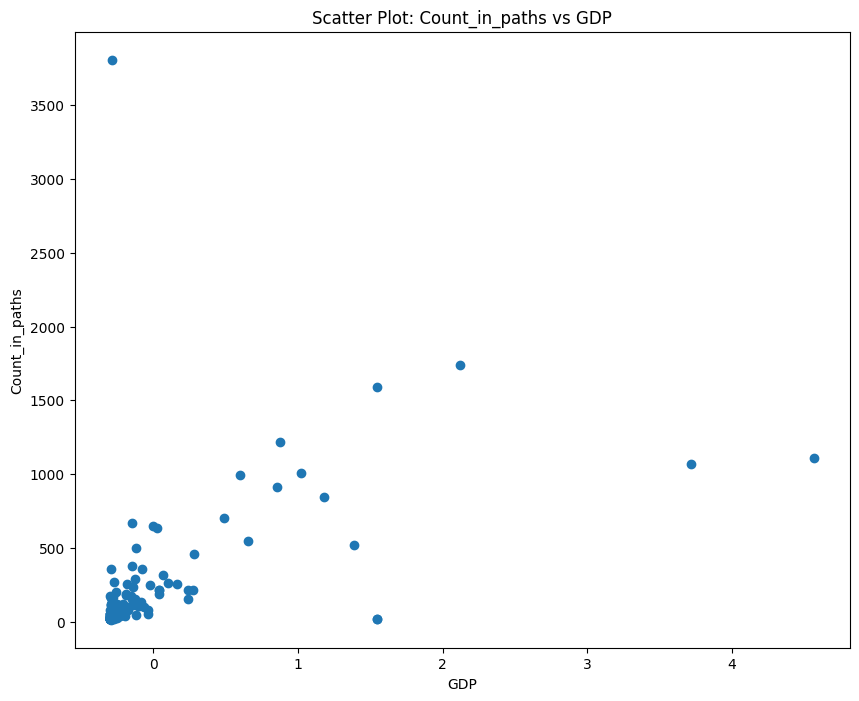

The differences in 'Count_in_paths' for countries with a GDP > 100000000000.0 is statistically significant with a p-value of: 0.0

Summary for dependancies between Count_in_paths ~ Weighted_Score : 
                             OLS Regression Results                            
Dep. Variable:         Count_in_paths   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     51.27
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           2.98e-11
Time:                        21:56:48   Log-Likelihood:                -1150.8
No. Observations:                 158   AIC:                             2306.
Df Residuals:                     156   BIC:                             2312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
          

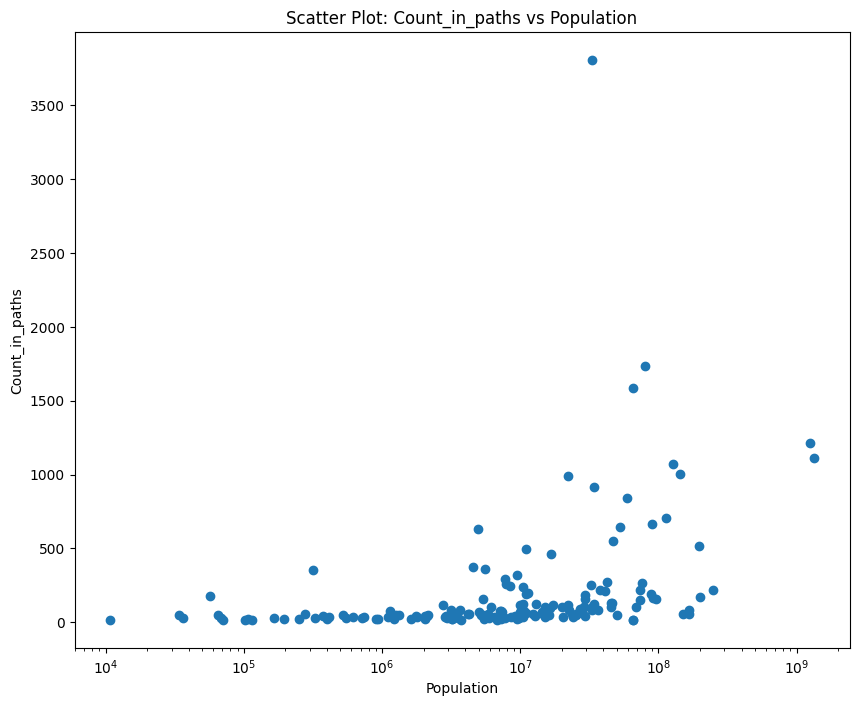

The differences in 'Count_in_paths' for countries with a Population > 10000000.0 is statistically significant with a p-value of: 0.0002

Summary for dependancies between Count_in_paths ~ Weighted_Score : 
                             OLS Regression Results                            
Dep. Variable:         Count_in_paths   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     19.10
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           2.25e-05
Time:                        21:56:50   Log-Likelihood:                -1164.1
No. Observations:                 158   AIC:                             2332.
Df Residuals:                     156   BIC:                             2338.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
    

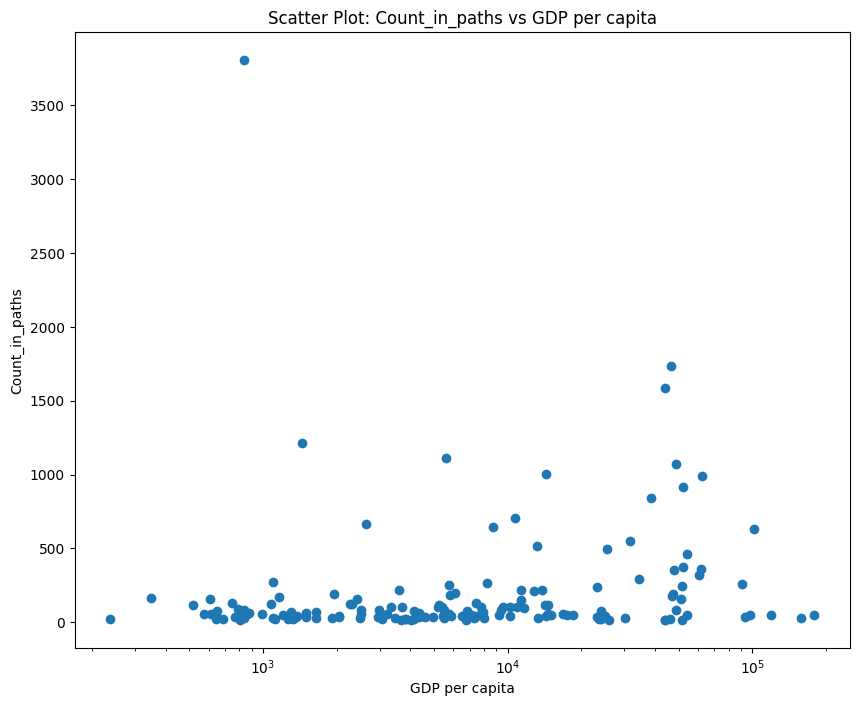

No significant differences in 'Count_in_paths' for countries with respect to their GDP per capita with a p-value of: 0.1966

Summary for dependancies between Count_in_paths ~ Weighted_Score : 
                             OLS Regression Results                            
Dep. Variable:         Count_in_paths   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.071
Date:                Wed, 20 Dec 2023   Prob (F-statistic):              0.152
Time:                        21:56:51   Log-Likelihood:                -1172.2
No. Observations:                 158   AIC:                             2348.
Df Residuals:                     156   BIC:                             2354.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                

/var/folders/px/v8m1fh9j1ng0_km3w7m2cyph0000gn/T/ipykernel_51196/1805260107.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['GDP_per_capita'] = df_merge['GDP per capita']


In [66]:
# import matplotlib.pyplot as plt

# df_countries = df_countries[df_countries.Count > 9].copy()

# # Graph 1: Avg success rate on y, GDP on x
# plt.figure(figsize=(10, 8))
# plt.scatter(df_countries['GDP'], df_countries['Average Success Rate'])
# plt.xlabel('GDP')
# plt.ylabel('Average Success Rate')
# plt.title('Scatter Plot: Avg Success Rate vs GDP')
# plt.xscale('log')
# plt.show()

# # Graph 2: Avg success rate on y, Population on x
# plt.figure(figsize=(10, 8))
# plt.scatter(df_countries['Population'], df_countries['Average Success Rate'])
# plt.xlabel('Population')
# plt.ylabel('Average Success Rate')
# plt.title('Scatter Plot: Avg Success Rate vs Population')
# plt.xscale('log')
# plt.show()

# # Graph 3: Avg excess path length on y, GDP on x
# plt.figure(figsize=(10, 8))
# plt.scatter(df_countries['GDP'], df_countries['Average Excess Path Length'])
# plt.xlabel('GDP')
# plt.ylabel('Average Excess Path Length')
# plt.title('Scatter Plot: Avg Excess Path Length vs GDP')
# plt.xscale('log')
# plt.show()

# # Graph 4: Avg excess path length on y, Population on x
# plt.figure(figsize=(10, 8))
# plt.scatter(df_countries['Population'], df_countries['Average Excess Path Length'])
# plt.xlabel('Population')
# plt.ylabel('Average Excess Path Length')
# plt.title('Scatter Plot: Avg Excess Path Length vs Population')
# plt.xscale('log')
# plt.show()

# # Graph 5: Avg success rate y, GDP per capita on x
# plt.figure(figsize=(10, 8))
# plt.scatter(df_countries['GDP per capita'], df_countries['Average Success Rate'])
# plt.xlabel('GDP per capita')
# plt.ylabel('Average Success Rate')
# plt.title('Scatter Plot: Avg Success Rate vs GDP per capita')
# plt.xscale('log')
# plt.show()

# # Graph 6: Avg excess path length on y, GDP per capita on x
# plt.figure(figsize=(10, 8))
# plt.scatter(df_countries['GDP per capita'], df_countries['Average Excess Path Length'])
# plt.xlabel('GDP per capita')
# plt.ylabel('Average Excess Path Length')
# plt.title('Scatter Plot: Avg Excess Path Length vs GDP per capita')
# plt.xscale('log')
# plt.show()

df_merge = df_merge[df_merge['Normalized GDP'] <7]
plt.figure(figsize=(10, 8))
plt.scatter(df_merge['Normalized_GDP'], df_merge['Count_in_paths'])
plt.xlabel('GDP')
plt.ylabel('Count_in_paths')
plt.title('Scatter Plot: Count_in_paths vs GDP')
plt.show()



threshold_GDP = 10e10
df_above_threshold = df_merge[df_merge['GDP'] > threshold_GDP]
df_below_threshold = df_merge[df_merge['GDP'] <= threshold_GDP]

t_stat, p_value_ttest = ttest_ind(df_above_threshold['Count_in_paths'], df_below_threshold['Count_in_paths'], equal_var=False)

if p_value_ttest < 0.05:
    print("The differences in 'Count_in_paths' for countries with a GDP > {} is statistically significant with a p-value of: {}".format(threshold_GDP, p_value_ttest.round(4)))
    print('')
else:
    print("No significant differences in 'Count_in_paths' for countries with respect to their GDP with a p-value of: {}".format(p_value_ttest.round(4)))
    print('')

model1 = smf.ols(formula='Count_in_paths ~ Normalized_GDP', data=df_merge).fit()
summary1 = model1.summary()
print("Summary for dependancies between Count_in_paths ~ Weighted_Score : \n",summary1, "\n")




plt.figure(figsize=(10, 8))
plt.scatter(df_merge['Population'], df_merge['Count_in_paths'])
plt.xlabel('Population')
plt.ylabel('Count_in_paths')
plt.title('Scatter Plot: Count_in_paths vs Population')
plt.xscale('log')
plt.show()

threshold_Population = 10e6
df_above_threshold = df_merge[df_merge['Population'] > threshold_Population]
df_below_threshold = df_merge[df_merge['Population'] <= threshold_Population]

t_stat, p_value_ttest = ttest_ind(df_above_threshold['Count_in_paths'], df_below_threshold['Count_in_paths'], equal_var=False)

if p_value_ttest < 0.05:
    print("The differences in 'Count_in_paths' for countries with a Population > {} is statistically significant with a p-value of: {}".format(threshold_Population, p_value_ttest.round(4)))
    print('')
else:
    print("No significant differences in 'Count_in_paths' for countries with respect to their Population with a p-value of: {}".format(p_value_ttest.round(4)))
    print('')

model1 = smf.ols(formula='Count_in_paths ~ Population', data=df_merge).fit()
summary1 = model1.summary()
print("Summary for dependancies between Count_in_paths ~ Weighted_Score : \n",summary1, "\n")


plt.figure(figsize=(10, 8))
plt.scatter(df_merge['GDP per capita'], df_merge['Count_in_paths'])
plt.xlabel('GDP per capita')
plt.ylabel('Count_in_paths')
plt.title('Scatter Plot: Count_in_paths vs GDP per capita')
plt.xscale('log')
plt.show()



threshold_gdp_per_capita = 5*10e3
df_above_threshold = df_merge[df_merge['GDP per capita'] > threshold_gdp_per_capita]
df_below_threshold = df_merge[df_merge['GDP per capita'] <= threshold_gdp_per_capita]
df_merge['GDP_per_capita'] = df_merge['GDP per capita']

t_stat, p_value_ttest = ttest_ind(df_above_threshold['Count_in_paths'], df_below_threshold['Count_in_paths'], equal_var=False)

if p_value_ttest < 0.05:
    print("The differences in 'Count_in_paths' for countries with a GDP per capita > {} is statistically significant with a p-value of: {}".format(threshold_gdp_per_capitas, p_value_ttest.round(4)))
    print('')
else:
    print("No significant differences in 'Count_in_paths' for countries with respect to their GDP per capita with a p-value of: {}".format(p_value_ttest.round(4)))
    print('')

model1 = smf.ols(formula='Count_in_paths ~ GDP_per_capita', data=df_merge).fit()
summary1 = model1.summary()
print("Summary for dependancies between Count_in_paths ~ Weighted_Score : \n",summary1, "\n")


In [15]:
def add_trophy_column(df):
    # Define the country and trophy lists
    country_list = ['Argentina', 'Australia', 'Brazil', 'China', 'Croatia', 'Croatia', 'Cuba', 'Czech Republic', 'Germany', 'Italy', 'Japan', 'Russia', 'South Africa', 'Spain', 'Sweden', 'United Kingdom', 'Uruguay']
    trophy_list = ['4', '2', '11', '5', '1', '1', '4', '1', '8', '7', '1', '3', '3', '5', '2', '2', '2']

    # Create a dictionary to map countries to trophies
    country_trophy_mapping = dict(zip(country_list, trophy_list))

    # Add a new column 'Trophy_Won' to the DataFrame with default value 0
    df['Trophy_Won'] = 0

    # Update the 'Trophy_Won' column based on the country_trophy_mapping
    df['Trophy_Won'] = df['Country'].map(country_trophy_mapping).fillna(0)

    return df[['Country', 'Trophy_Won']]

# Assuming df_merge is your original DataFrame
df_countries_worldcup = add_trophy_column(df_merge.copy())
df_countries_worldcup['Trophy_Won'] = pd.to_numeric(df_countries_worldcup['Trophy_Won'], errors='coerce')

In [16]:
olympic_medals_path = '../olympic_medals_by_country.csv'
df_olympic_medals = pd.read_csv(olympic_medals_path,comment='#',sep=',')
selected_columns = ['country', 'olympicMedalsByCountry_totAll', 'olympicMedalsByCountry_totGold', 'olympicMedalsByCountry_totSilv', 'olympicMedalsByCountry_totBrz']
df_olympic_medals = df_olympic_medals[selected_columns].copy()
df_olympic_medals.rename(columns={'country': 'Country', 'olympicMedalsByCountry_totAll': 'Total_medals', 'olympicMedalsByCountry_totGold': 'Gold_medals', 'olympicMedalsByCountry_totSilv': 'Sil_medals', 'olympicMedalsByCountry_totBrz': 'Bronze_medals'}, inplace=True)


display(df_olympic_medals)

,Country,Total_medals,Gold_medals,Sil_medals,Bronze_medals
0,India,35.0,10.0,9.0,16.0
1,China,696.0,275.0,227.0,194.0
2,United States,2980.0,1180.0,959.0,841.0
3,Indonesia,37.0,8.0,14.0,15.0
4,Pakistan,10.0,3.0,3.0,4.0
...,...,...,...,...,...
131,Tonga,1.0,0.0,1.0,0.0
132,Bermuda,2.0,1.0,0.0,1.0
133,Liechtenstein,10.0,2.0,2.0,6.0
134,San Marino,3.0,0.0,1.0,2.0


In [17]:
merged_medal_df = pd.merge(df_countries_worldcup[['Country','Trophy_Won']], df_olympic_medals, on='Country', how='left')
merged_medal_df.fillna(0, inplace=True)

merged_medal_df.rename(columns={'Trophy_Won': 'World_Cups'}, inplace=True)
weight_world_cup = 10
weight_gold = 6
weight_silver = 4
weight_bronze = 1

merged_medal_df['Weighted_Score'] = (
    weight_world_cup * merged_medal_df['World_Cups'] +
    weight_gold * merged_medal_df['Gold_medals'] +
    weight_silver * merged_medal_df['Sil_medals'] +
    weight_bronze * merged_medal_df['Bronze_medals']
)

merged_medal_df = merged_medal_df[['Country', 'Weighted_Score','World_Cups', 'Total_medals', 'Gold_medals', 'Sil_medals', 'Bronze_medals']]
merged_medal_df['Count_in_paths'] = df_merge['Count_in_paths']

display(merged_medal_df.sort_values('Weighted_Score', ascending=False))

,Country,Weighted_Score,World_Cups,Total_medals,Gold_medals,Sil_medals,Bronze_medals,Count_in_paths
7,Germany,3316.0,8,892.0,293.0,293.0,306.0,1738
49,France,3031.0,0,874.0,258.0,289.0,327.0,1588
0,China,2802.0,5,696.0,275.0,227.0,194.0,1110
6,Italy,2769.0,7,742.0,257.0,224.0,261.0,843
21,Sweden,2372.0,2,661.0,205.0,222.0,234.0,319
...,...,...,...,...,...,...,...,...
114,Bhutan,0.0,0,0.0,0.0,0.0,0.0,28
113,Chad,0.0,0,0.0,0.0,0.0,0.0,53
14,Republic_of_China,0.0,0,0.0,0.0,0.0,0.0,127
108,Yemen,0.0,0,0.0,0.0,0.0,0.0,49


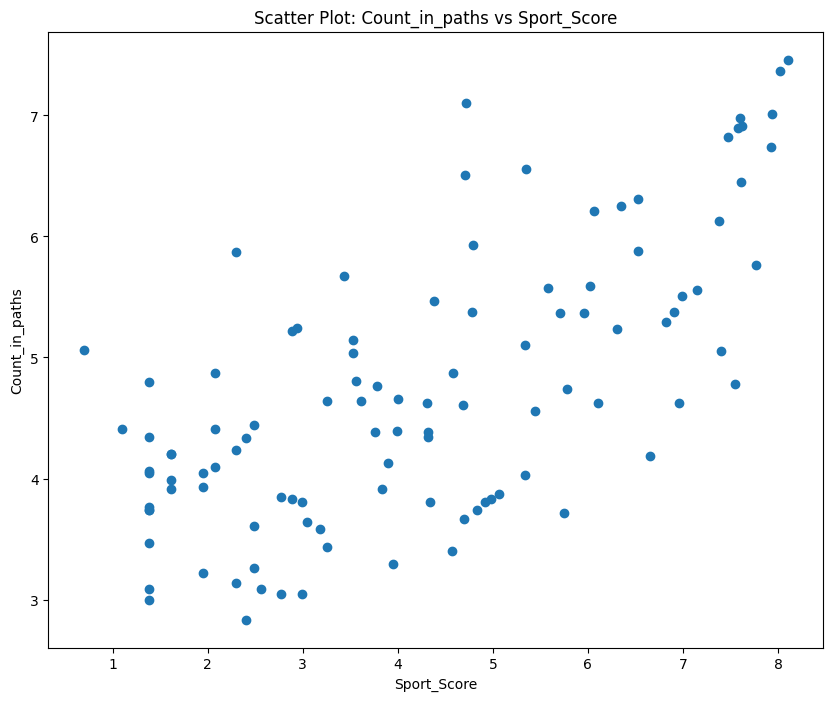

In [57]:
logarithmic_df = pd.DataFrame()
logarithmic_df['Weighted_Score'] = merged_medal_df['Weighted_Score'].apply(lambda x: np.log(x) if x != 0 else x).copy()
logarithmic_df['Count_in_paths'] = df_merge['Count_in_paths'].apply(lambda x: np.log(x) if x != 0 else x).copy()
logarithmic_df = logarithmic_df[logarithmic_df['Weighted_Score'] > 0]

plt.figure(figsize=(10, 8))
plt.scatter(logarithmic_df['Weighted_Score'], logarithmic_df['Count_in_paths'])
plt.xlabel('Sport_Score')
plt.ylabel('Count_in_paths')
plt.title('Scatter Plot: Count_in_paths vs Sport_Score')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

In [50]:
threshold_sports_score = 100
df_above_threshold = merged_medal_df[merged_medal_df['Weighted_Score'] > threshold_sports_score]
df_below_threshold = merged_medal_df[merged_medal_df['Weighted_Score'] <= threshold_sports_score]

t_stat, p_value_ttest = ttest_ind(df_above_threshold['Count_in_paths'], df_below_threshold['Count_in_paths'], equal_var=False)

if p_value_ttest < 0.05:
    print("The differences in 'Count_in_paths' for countries with an athletic score > {} is statistically significant with a p-value of: {}".format(threshold_sports_score, p_value_ttest.round(4)))
else:
    print("No significant differences in 'Count_in_paths' for countries with respect to their athletic score with a p-value of: {}".format(p_value_ttest.round(4)))

The differences in 'Count_in_paths' for countries with an athletic score > 100 is statistically significant with a p-value of: 0.0007


In [58]:
model1 = smf.ols(formula='Count_in_paths ~ Weighted_Score', data=logarithmic_df).fit()
summary1 = model1.summary()
print("Summary for dependancies between Count_in_paths ~ Weighted_Score : \n",summary1, "\n")

Summary for dependancies between Count_in_paths ~ Weighted_Score : 
                             OLS Regression Results                            
Dep. Variable:         Count_in_paths   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     91.34
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           6.57e-16
Time:                        21:48:50   Log-Likelihood:                -129.44
No. Observations:                 106   AIC:                             262.9
Df Residuals:                     104   BIC:                             268.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [20]:
military_path = '../military_power.csv'
military_col = ['country', 'power']

# Use 'thousands' parameter to handle commas as thousand separators
df_military_power = pd.read_csv(military_path, comment='#', sep=',', names=military_col)

# Extract the part before the first comma and convert to float
df_military_power['power'] = df_military_power['power'].str.split(',').str[0].astype(float)

,Country,power
46,United_States,752288.0


,Country,power
180,Brunei,4.0


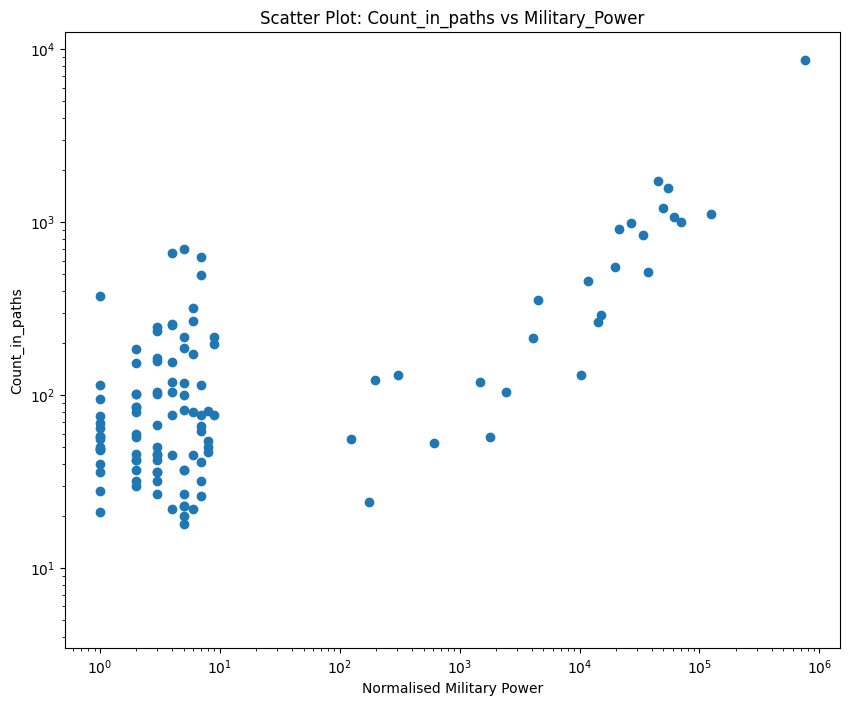

In [44]:
def add_military_power(df):
    country_list = df_military_power['country']
    power_list = df_military_power['power']
    country_power_mapping = dict(zip(country_list, power_list))

    df['power'] = 0
    df['power'] = df['Country'].map(country_power_mapping).fillna(0)

    return df[['Country', 'power']]

df_countries_military  = add_military_power(df_merge.copy())

display(df_countries_military[df_countries_military['Country']=='United_States'])
display(df_countries_military[df_countries_military['Country']=='Brunei'])

df_countries_military['Count_in_paths'] = df_merge['Count_in_paths']
plt.figure(figsize=(10, 8))
plt.scatter(df_countries_military['power'], df_merge['Count_in_paths'])
plt.xlabel('Normalised Military Power')
plt.ylabel('Count_in_paths')
plt.title('Scatter Plot: Count_in_paths vs Military_Power')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [22]:
threshold_military_power = 7 * 1000
df_above_threshold = df_countries_military[df_countries_military['power'] > threshold_military_power]
df_below_threshold = df_countries_military[df_countries_military['power'] <= threshold_military_power]

t_stat, p_value_ttest = ttest_ind(df_above_threshold['Count_in_paths'], df_below_threshold['Count_in_paths'], equal_var=False)

if p_value_ttest < 0.05:
    print("The differences in 'Count_in_paths' for countries with a military power > {} are statistically significant with a p-value of: {}".format(threshold_military_power, p_value_ttest.round(4)))
else:
    print("No significant differences in 'Count_in_paths' for countries with respect to their military power with a p-value of: {}".format(p_value_ttest.round(4)))

The differences in 'Count_in_paths' for countries with a military power > 7000 are statistically significant with a p-value of: 0.0274


In [43]:
model1 = smf.ols(formula='Count_in_paths ~ power', data=df_countries_military).fit()
summary1 = model1.summary()
print("Summary for dependancies between literacy_rate ~ Count_in_paths : \n",summary1, "\n")

Summary for dependancies between literacy_rate ~ Count_in_paths : 
                             OLS Regression Results                            
Dep. Variable:         Count_in_paths   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     891.0
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           7.64e-80
Time:                        21:38:56   Log-Likelihood:                -1601.0
No. Observations:                 225   AIC:                             3206.
Df Residuals:                     223   BIC:                             3213.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

,Country,literacy_rate,Count_in_paths
30,Niger,28.7,54


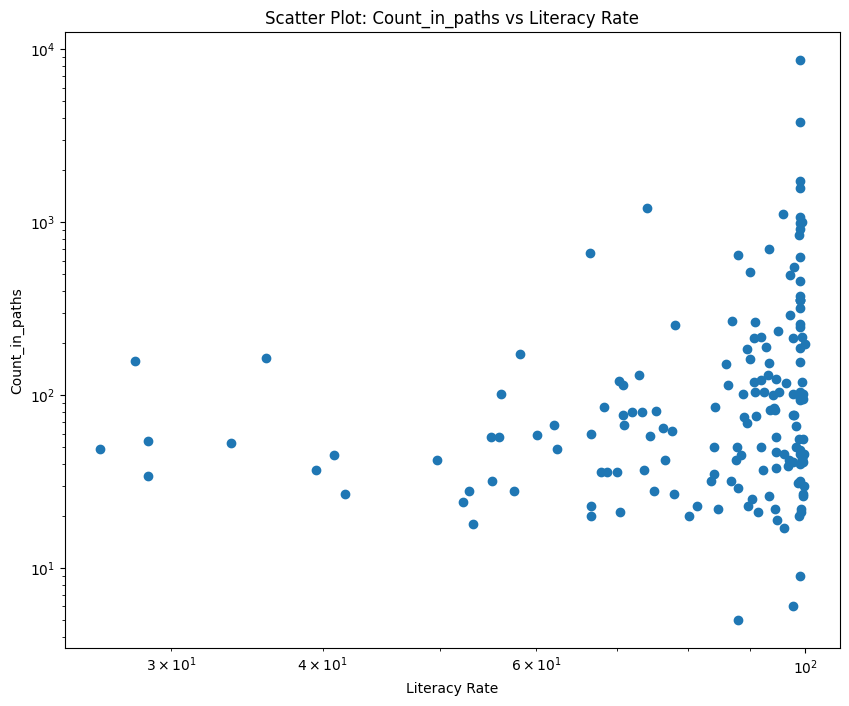

In [23]:
literacy_path = '../literacy_rate.csv'
literacy_col = ['country', 'ISO', 'literacy_rate']

df_literacy = pd.read_csv(literacy_path,comment='#',sep=',', names=literacy_col)

def add_literacy(df):
    country_list = df_literacy['country']
    literacy_list = df_literacy['literacy_rate']
    literacy_mapping = dict(zip(country_list, literacy_list))

    df['literacy_rate'] = 0
    df['literacy_rate'] = df['Country'].map(literacy_mapping).fillna(0)

    return df[['Country', 'literacy_rate']]

df_literacy  = add_literacy(df_merge.copy())
df_literacy['Count_in_paths'] = df_merge['Count_in_paths']
display(df_literacy[df_literacy['Country']=="Niger"])
plt.figure(figsize=(10, 8))
plt.scatter(df_literacy['literacy_rate'], df_merge['Count_in_paths'])
plt.xlabel('Literacy Rate')
plt.ylabel('Count_in_paths')
plt.title('Scatter Plot: Count_in_paths vs Literacy Rate')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [24]:

threshold_literacy_score = 95
df_above_threshold = df_literacy[df_literacy['literacy_rate'] > threshold_literacy_score]
df_below_threshold = df_literacy[df_literacy['literacy_rate'] <= threshold_literacy_score]

t_stat, p_value_ttest = ttest_ind(df_above_threshold['Count_in_paths'], df_below_threshold['Count_in_paths'], equal_var=False)

if p_value_ttest < 0.05:
    print("The differences in 'Count_in_paths' for countries with a literacy score > {} are statistically significant with a p-value of: {}".format(threshold_literacy_score, p_value_ttest.round(4)))
else:
    print("No significant differences in 'Count_in_paths' for countries with respect to their literacy score with a p-value of: {}".format(p_value_ttest.round(4)))

The differences in 'Count_in_paths' for countries with a literacy score > 95 are statistically significant with a p-value of: 0.0165


In [41]:
model1 = smf.ols(formula='Count_in_paths ~ literacy_rate', data=df_literacy).fit()
summary1 = model1.summary()
print("Summary for dependancies between literacy_rate ~ Count_in_paths : \n",summary1, "\n")


Summary for dependancies between literacy_rate ~ Count_in_paths : 
                             OLS Regression Results                            
Dep. Variable:         Count_in_paths   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     7.034
Date:                Wed, 20 Dec 2023   Prob (F-statistic):            0.00857
Time:                        21:37:24   Log-Likelihood:                -1778.4
No. Observations:                 225   AIC:                             3561.
Df Residuals:                     223   BIC:                             3568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

,Country,Nb_of_Movies,Count_in_paths
46,United_States,24285.0,8675


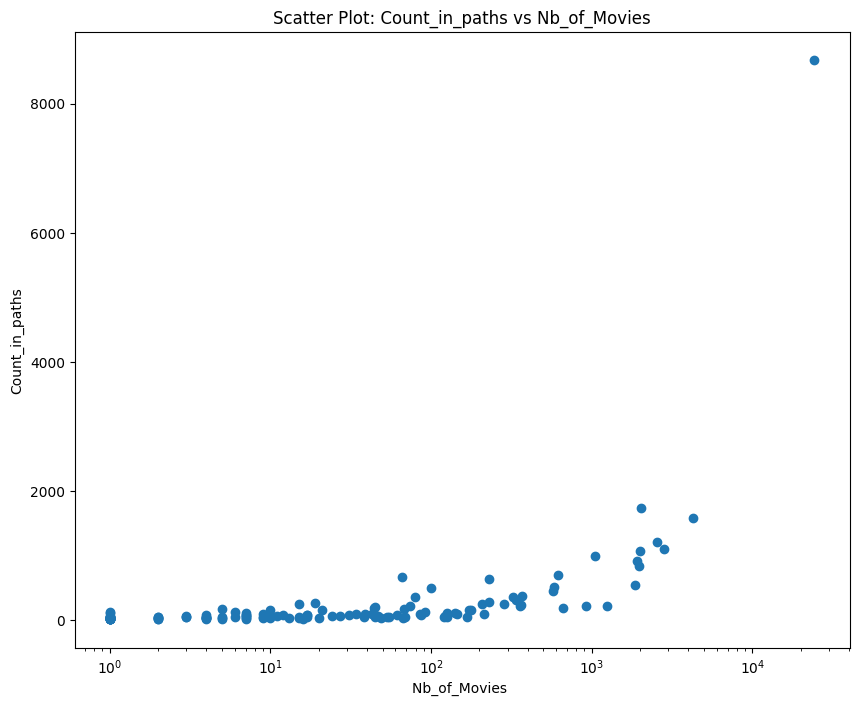

In [25]:
movies_path = '../movies_per_country.csv'
df_movies = pd.read_csv(movies_path, comment='#', sep=',')
df_movies['Nb of Movies'] = df_movies['Nb of Movies'].replace({',': ''}, regex=True).astype(float)

def add_movies(df):
    country_list = df_movies['Country']
    movies_list = df_movies['Nb of Movies']
    movies_mapping = dict(zip(country_list, movies_list))

    df['Nb_of_Movies'] = 0
    df['Nb_of_Movies'] = df['Country'].map(movies_mapping).fillna(0)

    return df[['Country', 'Nb_of_Movies']]

df_movies = add_movies(df_merge.copy())
df_movies['Count_in_paths'] = df_merge['Count_in_paths']

display(df_movies[df_movies['Country']=='United_States'])
plt.figure(figsize=(10, 8))
plt.scatter(df_movies['Nb_of_Movies'], df_merge['Count_in_paths'])
plt.xlabel('Nb_of_Movies ')
plt.ylabel('Count_in_paths')
plt.title('Scatter Plot: Count_in_paths vs Nb_of_Movies')
plt.xscale('log')
plt.show()

In [26]:
threshold_movies = 100
df_above_threshold = df_movies[df_movies['Nb_of_Movies'] > threshold_movies]
df_below_threshold = df_movies[df_movies['Nb_of_Movies'] <= threshold_movies]

t_stat, p_value_ttest = ttest_ind(df_above_threshold['Count_in_paths'], df_below_threshold['Count_in_paths'], equal_var=False)

if p_value_ttest < 0.05:
    print("The differences in 'Count_in_paths' for countries with a number of movies > {} are statistically significant with a p-value of: {}".format(threshold_movies, p_value_ttest.round(4)))
else:
    print("No significant differences in 'Count_in_paths' for countries with respect to the number of movies they produce with a p-value of: {}".format(p_value_ttest.round(4)))

The differences in 'Count_in_paths' for countries with a number of movies > 100 are statistically significant with a p-value of: 0.0183


0           China
1         Vietnam
2           Japan
3          Russia
4          Canada
          ...    
214    Mauritania
215      Honduras
216      Abkhazia
219        Tuvalu
221    Martinique
Name: Country, Length: 158, dtype: object

0     United_states
1             China
2             Japan
3             India
4             Korea
5         Indonesia
6            Russia
7           Vietnam
8         Singapore
9          Thailand
10         Malaysia
11      Philippines
12           Brunei
13         Cambodia
14       Bangladesh
15         Pakistan
16             Laos
17          Myanmar
18            Lanka
19           Taiwan
Name: Country, dtype: object

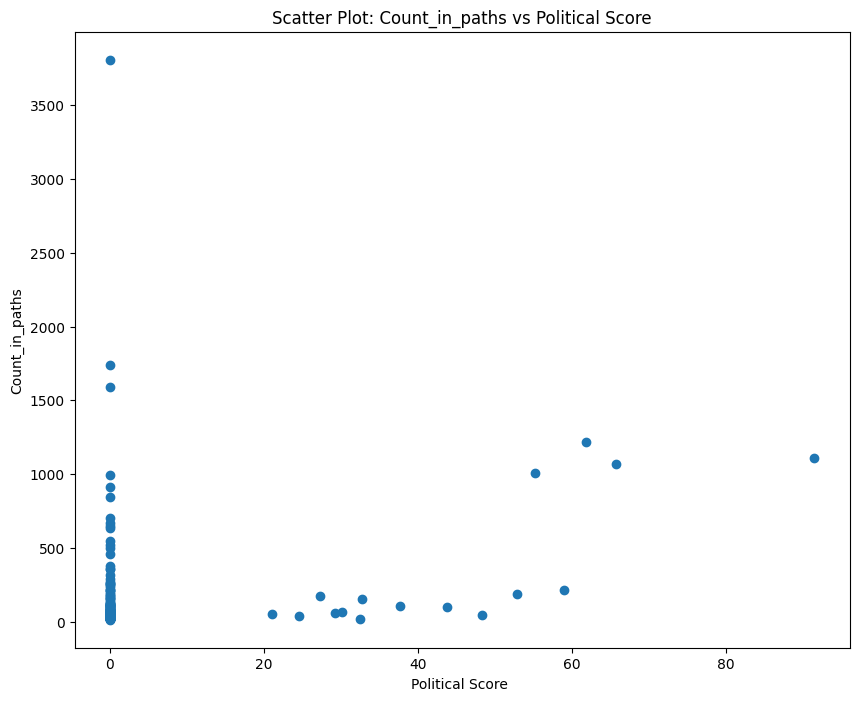

In [69]:
political_path = '../country_political_influence.csv'

df_pol_influence = pd.read_csv(political_path,comment='#',sep=',')
df_pol_influence['Percentage'] = df_pol_influence['Percentage'].astype(float)
df_pol_influence['Country'] = df_pol_influence['Country'].str.lower().str.strip().str.capitalize()

def add_polt_influence(df):
    country_list = df_pol_influence['Country']
    pol_influnece_list = df_pol_influence['Percentage']
    pol_influence_mapping = dict(zip(country_list, pol_influnece_list))
    df['political_score'] = 0
    df['political_score'] = df['Country'].map(pol_influence_mapping).fillna(0)

    return df[['Country', 'political_score']]

df_pol_influence = add_polt_influence(df_merge.copy())
df_pol_influence['Count_in_paths'] = df_merge['Count_in_paths']

plt.figure(figsize=(10, 8))
plt.scatter(df_pol_influence['political_score'], df_merge['Count_in_paths'])
plt.xlabel('Political Score ')
plt.ylabel('Count_in_paths')
plt.title('Scatter Plot: Count_in_paths vs Political Score')
#plt.xscale('log')
plt.show()

In [28]:
threshold_pol_score = 20
df_above_threshold = df_pol_influence[df_pol_influence['political_score'] > threshold_pol_score]
df_below_threshold = df_pol_influence[df_pol_influence['political_score'] <= threshold_pol_score]

t_stat, p_value_ttest = ttest_ind(df_above_threshold['Count_in_paths'], df_below_threshold['Count_in_paths'], equal_var=False)

if p_value_ttest < 0.05:
    print("The differences in 'Count_in_paths' for countries with a political score > {} are statistically significant with a p-value of: {}".format(threshold_pol_score, p_value_ttest.round(4)))
else:
    print("No significant differences in 'Count_in_paths' for countries with a political score > {} with a p-value of: {}".format(threshold_pol_score, p_value_ttest.round(4)))

No significant differences in 'Count_in_paths' for countries with a political score > 20 with a p-value of: 0.2031


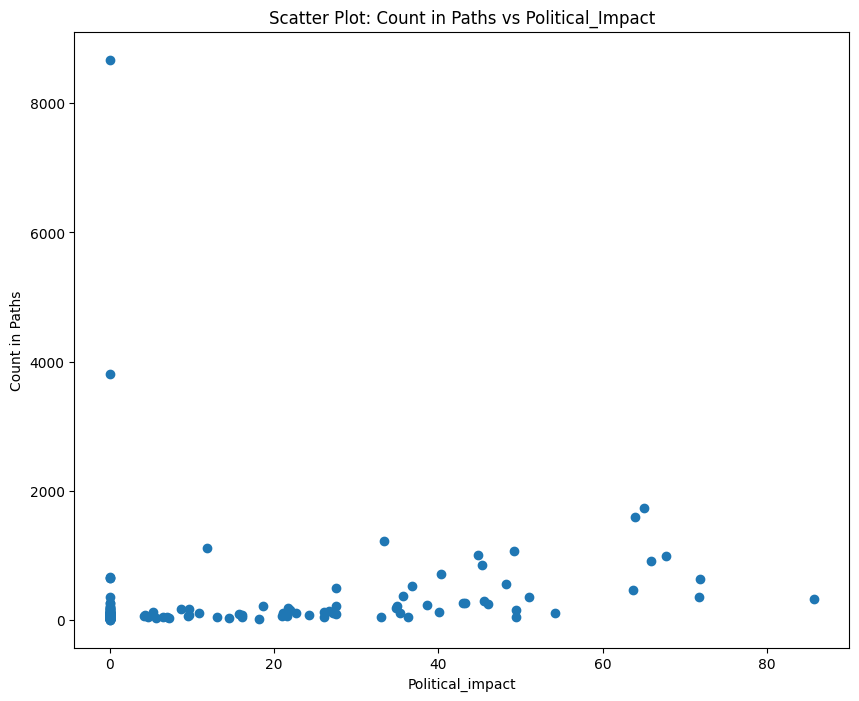

In [29]:
political_impact_path = '../Impact_per_country.csv'
df_political_impact = pd.read_csv(political_impact_path, comment='#', sep=',')
df_political_impact = df_political_impact.reset_index()
def add_political_impact(df):
    country_list = df_political_impact['index']
    pol_impact_list = df_political_impact['Impact']
    pol_impact_mapping = dict(zip(country_list, pol_impact_list))
    
    df['political_impact'] = 0
    df['political_impact'] = df['Country'].map(pol_impact_mapping).fillna(0)

    return df[['Country', 'political_impact']]

df_political_impact = add_political_impact(df_merge.copy())
df_political_impact['Count_in_paths'] = df_merge['Count_in_paths']

plt.figure(figsize=(10, 8))
plt.scatter(df_political_impact['political_impact'], df_merge['Count_in_paths'])
plt.xlabel('Political_impact')
plt.ylabel('Count in Paths')
plt.title('Scatter Plot: Count in Paths vs Political_Impact')
plt.show()


In [30]:
threshold_pol_impact = 15
df_above_threshold = df_political_impact[df_political_impact['political_impact'] > threshold_pol_impact]
df_below_threshold = df_political_impact[df_political_impact['political_impact'] <= threshold_pol_impact]

t_stat, p_value_ttest = ttest_ind(df_above_threshold['Count_in_paths'], df_below_threshold['Count_in_paths'], equal_var=False)

if p_value_ttest < 0.05:
    print("The differences in 'Count_in_paths' for countries with a political score > {} are statistically significant with a p-value of: {}".format(threshold_pol_impact, p_value_ttest.round(4)))
else:
    print("No significant differences in 'Count_in_paths' for countries with a political score > {} with a p-value of: {}".format(threshold_pol_impact, p_value_ttest.round(4)))


The differences in 'Count_in_paths' for countries with a political score > 15 are statistically significant with a p-value of: 0.0056


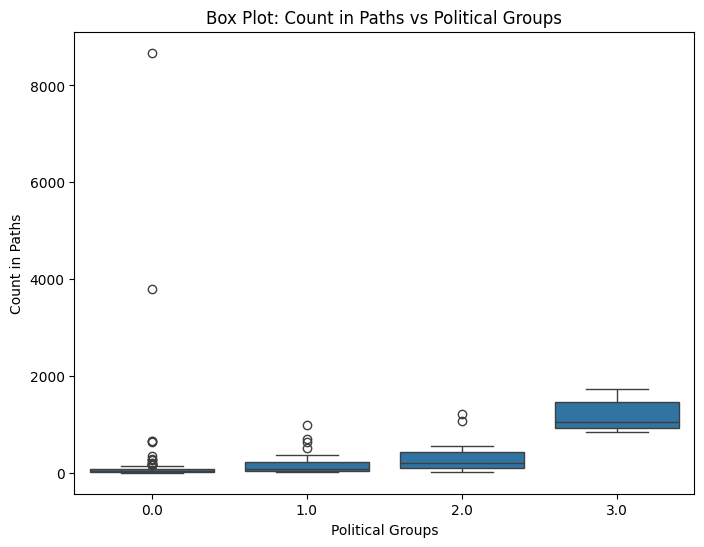

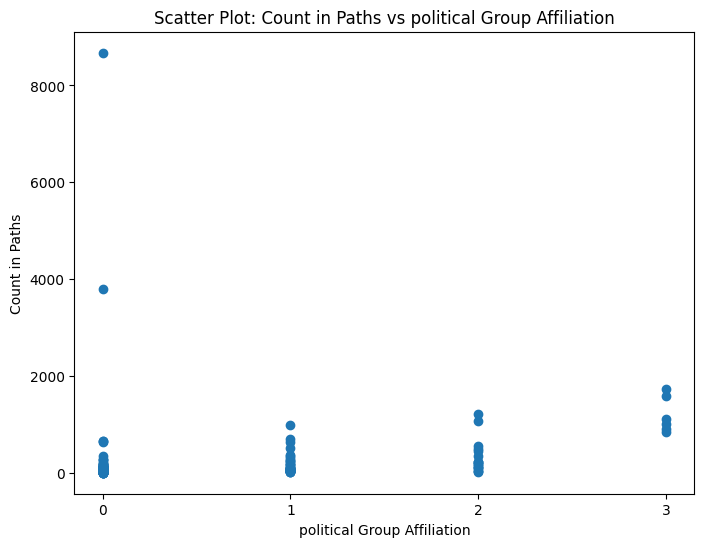

In [31]:
political_groups_path = '../political_groups.csv'
political_groups_col = ['Country','G7', 'BRICS', 'ASEAN', 'SCO', 'OPEC', 'APEC', 'NATO', 'AU', 'EU']
df_political_groups = pd.read_csv(political_groups_path, comment='#', sep=',', names=political_groups_col)
df_political_groups['total_groups'] =df_political_groups.iloc[:, 1:].sum(axis=1)

def add_political_groups(df):
    country_list = df_political_groups['Country']
    pol_group_list = df_political_groups['total_groups']
    pol_group_mapping = dict(zip(country_list, pol_group_list))
    
    df['political_groups'] = 0
    df['political_groups'] = df['Country'].map(pol_group_mapping).fillna(0)

    return df[['Country', 'political_groups']]

df_political_groups = add_political_groups(df_merge.copy())
df_political_groups['Count_in_paths'] = df_merge['Count_in_paths']

# Create a box plot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='political_groups', y='Count_in_paths', data=df_political_groups)
plt.xlabel('Political Groups')
plt.ylabel('Count in Paths')
plt.title('Box Plot: Count in Paths vs Political Groups')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df_political_groups['political_groups'], df_merge['Count_in_paths'])
plt.xlabel('political Group Affiliation')
plt.xticks(range(0,4))
plt.ylabel('Count in Paths')
plt.title('Scatter Plot: Count in Paths vs political Group Affiliation')
plt.show()


In [32]:
anova_result_groups = f_oneway(*[group['Count_in_paths'] for _, group in df_political_groups.groupby('political_groups')])
p_value_groups = anova_result_groups.pvalue

if p_value_groups < 0.05:
    print("The differences in Number of counts per path due to different political presence of a country is statistically significant with a p_value of : ", p_value_groups.round(4))
else:
    print("No significant differences in 'total_groups' across continents.")

The differences in Number of counts per path due to different political presence of a country is statistically significant with a p_value of :  0.0014


,average_success_rate,Country
0,1.000000,China
1,0.916667,Vietnam
2,0.937500,Japan
3,1.000000,Russia
4,0.909091,Canada
...,...,...
220,0.750000,South_Ossetia
221,1.000000,Martinique
222,1.000000,British_Indian_Ocean_Territory
223,0.888889,Saint_Kitts_and_Nevis


,Country,Count_in_paths,Europe,North_America,South_America,Africa,Asia,Oceania,Antarctica,continent,average_success_rate
0,China,1110,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Asia,1.000000
1,Vietnam,190,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Asia,0.916667
2,Japan,1070,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Asia,0.937500
3,Russia,1007,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Asia,1.000000
4,Canada,915,0.0,1.0,0.0,0.0,0.0,0.0,0.0,North_America,0.909091
...,...,...,...,...,...,...,...,...,...,...,...
139,Luxembourg,46,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,1.000000
141,Lithuania,45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,1.000000
143,Botswana,50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Africa,0.944444
150,Guinea-Bissau,24,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Africa,0.875000


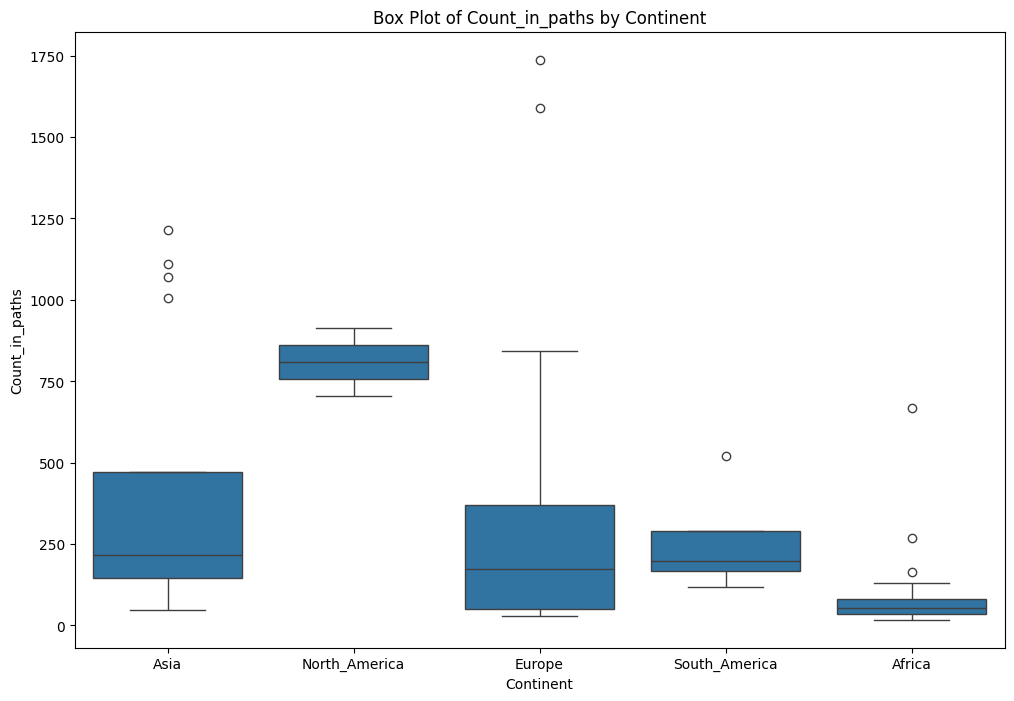

In [130]:
geographical_location_path = '../geographical_location.csv'
df_geographical_location = pd.read_csv(geographical_location_path, comment='#', sep=',')
df_geographical_location = pd.merge(df_merge, df_geographical_location, on='Country', how='left').copy()
df_merge_with_location = df_geographical_location[['Country', 'Count_in_paths', 'Europe', 'North_America', 'South_America', 'Africa', 'Asia', 'Oceania', 'Antarctica']]

df_merge_by_continent = df_merge_with_location.copy()
df_merge_by_continent['continent'] = None

continents = ['Europe', 'North_America', 'South_America', 'Africa', 'Asia']
for continent in continents:
    df_merge_by_continent.loc[df_merge_with_location[continent] == 1, 'continent'] = continent

average_success_rate_df = pd.DataFrame()
average_success_rate_df['average_success_rate'] = average_success_rate.values
average_success_rate_df['Country'] = df_countries['Country']

df_merge_by_continent = df_merge_by_continent.merge(average_success_rate_df[['Country', 'average_success_rate']], on='Country', how='left') 
df_merge_by_continent = df_merge_by_continent[df_merge_by_continent['continent'].notna()]


plt.figure(figsize=(12, 8))
sns.boxplot(x='continent', y='Count_in_paths', data=df_merge_by_continent)
plt.title('Box Plot of Count_in_paths by Continent')
plt.xlabel('Continent')
plt.ylabel('Count_in_paths')

# plt.figure(figsize=(12, 8))
# sns.boxplot(x='continent', y='Normalized_Count_in_paths', data=df_merge_with_location)
# plt.title('Box Plot of Normalized_Count_in_paths by Continent')
# plt.xlabel('Continent')
# plt.ylabel('Normalized_Count_in_paths')

plt.show()


In [34]:
anova_result = f_oneway(*[group['Count_in_paths'] for _, group in df_merge_by_continent.groupby('continent')])
p_value_continent = anova_result.pvalue

if p_value_continent < 0.05:
    print("The differences in the counts per path across continents are statistically significant with a P values of : ", p_value_continent.round(4))
else:
    print("No significant differences in 'Count_in_paths' across continents.")

The differences in the counts per path across continents are statistically significant with a P values of :  0.0004


In [97]:
model1 = smf.ols(formula='Count_in_paths ~ Asia', data=df_merge_by_continent).fit()
summary1 = model1.summary()
print("Summary for dependancies between Count_in_paths ~ Asia : \n",summary1, "\n")

Summary for dependancies between Count_in_paths ~ Asia : 
                             OLS Regression Results                            
Dep. Variable:         Count_in_paths   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     4.604
Date:                Wed, 20 Dec 2023   Prob (F-statistic):             0.0348
Time:                        22:21:25   Log-Likelihood:                -622.70
No. Observations:                  86   AIC:                             1249.
Df Residuals:                      84   BIC:                             1254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [98]:
model1 = smf.ols(formula='Count_in_paths ~ North_America', data=df_merge_by_continent).fit()
summary1 = model1.summary()
print("Summary for dependancies between Count_in_paths ~ North_America : \n",summary1, "\n")

Summary for dependancies between Count_in_paths ~ Asia : 
                             OLS Regression Results                            
Dep. Variable:         Count_in_paths   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     5.743
Date:                Wed, 20 Dec 2023   Prob (F-statistic):             0.0188
Time:                        22:21:25   Log-Likelihood:                -622.15
No. Observations:                  86   AIC:                             1248.
Df Residuals:                      84   BIC:                             1253.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [99]:
model1 = smf.ols(formula='Count_in_paths ~ South_America', data=df_merge_by_continent).fit()
summary1 = model1.summary()
print("Summary for dependancies between Count_in_paths ~ South_America : \n",summary1, "\n")

Summary for dependancies between Count_in_paths ~ Asia : 
                             OLS Regression Results                            
Dep. Variable:         Count_in_paths   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                  0.009693
Date:                Wed, 20 Dec 2023   Prob (F-statistic):              0.922
Time:                        22:21:37   Log-Likelihood:                -624.99
No. Observations:                  86   AIC:                             1254.
Df Residuals:                      84   BIC:                             1259.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [100]:
model1 = smf.ols(formula='Count_in_paths ~ Africa', data=df_merge_by_continent).fit()
summary1 = model1.summary()
print("Summary for dependancies between Count_in_paths ~ Africa : \n",summary1, "\n")

Summary for dependancies between Count_in_paths ~ Asia : 
                             OLS Regression Results                            
Dep. Variable:         Count_in_paths   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     16.86
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           9.28e-05
Time:                        22:22:01   Log-Likelihood:                -617.13
No. Observations:                  86   AIC:                             1238.
Df Residuals:                      84   BIC:                             1243.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [132]:
model1 = smf.ols(formula='Count_in_paths ~ Europe', data=df_merge_by_continent).fit()
summary1 = model1.summary()
print("Summary for dependancies between Count_in_paths ~ Europe : \n",summary1, "\n")

Summary for dependancies between Count_in_paths ~ Europe : 
                             OLS Regression Results                            
Dep. Variable:         Count_in_paths   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.237
Date:                Wed, 20 Dec 2023   Prob (F-statistic):              0.138
Time:                        22:35:24   Log-Likelihood:                -623.86
No. Observations:                  86   AIC:                             1252.
Df Residuals:                      84   BIC:                             1257.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [131]:
model1 = smf.ols(formula='average_success_rate ~ Asia', data=df_merge_by_continent).fit()
summary1 = model1.summary()
print("Summary for dependancies between Count_in_paths ~ Asia : \n",summary1, "\n")

Summary for dependancies between Count_in_paths ~ Africa : 
                              OLS Regression Results                             
Dep. Variable:     average_success_rate   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.011
Method:                   Least Squares   F-statistic:                   0.03840
Date:                  Wed, 20 Dec 2023   Prob (F-statistic):              0.845
Time:                          22:34:58   Log-Likelihood:                 32.721
No. Observations:                    86   AIC:                            -61.44
Df Residuals:                        84   BIC:                            -56.53
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [ ]:
model1 = smf.ols(formula='average_success_rate ~ North_America', data=df_merge_by_continent).fit()
summary1 = model1.summary()
print("Summary for dependancies between Count_in_paths ~ North_America : \n",summary1, "\n")

In [ ]:
model1 = smf.ols(formula='average_success_rate ~ South_America', data=df_merge_by_continent).fit()
summary1 = model1.summary()
print("Summary for dependancies between Count_in_paths ~ South_America : \n",summary1, "\n")

In [ ]:
model1 = smf.ols(formula='average_success_rate ~ Africa', data=df_merge_by_continent).fit()
summary1 = model1.summary()
print("Summary for dependancies between Count_in_paths ~ Africa : \n",summary1, "\n")

In [ ]:
model1 = smf.ols(formula='average_success_rate ~ Europe', data=df_merge_by_continent).fit()
summary1 = model1.summary()
print("Summary for dependancies between Count_in_paths ~ Europe : \n",summary1, "\n")